# Кластерный анализ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Продолжим пример с Ирисами Фишера

In [7]:
# dataset = pd.read_csv('iris.data', sep=',',header=None)
# dataset.columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth','Species']
# dataset.head()
dataset = pd.read_excel(open('факт.xlsx', 'rb'),   header=1, usecols='B:L', sheet_name='страх')
# df = df[['Среднедушевые доходы населения, тыс. руб', 'Численность безработных, тыс чел']]
# df.columns = ['x', 'y']
dataset

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,170000,10200,0,0,2,0,0,1,35,9,0
1,657000,36135,0,0,1,0,1,1,33,10,0
2,463000,37641,0,0,4,0,0,0,37,17,0
3,3000000,136800,0,0,1,0,1,0,28,10,0
4,814500,49349,0,0,3,0,1,0,33,10,0
...,...,...,...,...,...,...,...,...,...,...,...
239,500000,19615,0,0,4,19615,1,0,33,15,0
240,549000,51974,1000000,1794,4,0,1,1,27,4,0
241,321000,12006,250000,321000,2,0,0,0,39,2,0
242,358200,23103,0,0,1,0,0,1,28,1,0


Для любого из методов кластеризации сначала необходимо перейти к стандартизованным переменным!!!

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Standard = sc.fit_transform(dataset.iloc[:,:-1])

Почти для всех методов кластеризации необходимо знать число кластеров.

Для задачи с Ирисами Фишера число кластеров заранее известно - 3, в соответствие в числом сортов ирисов. Но в других задачах это не всегла известно.

Для определения количества кластеров проще всего провести иерархическую кластеризация

## Иерархическая кластеризация

### SciPy

Для иерархической кластеризации на Python можно использовать библиотеку SciPy, в которой для создания кластеров применяется метод linkage, а для предсказания меток — метод fcluster.

Иерархическая кластеризация требует от нас выбора как расстояния, так и метода компоновки. Мы будем использовать евклидово расстояние и метод компоновки Уорда, который пытается минимизировать различия между кластерами.

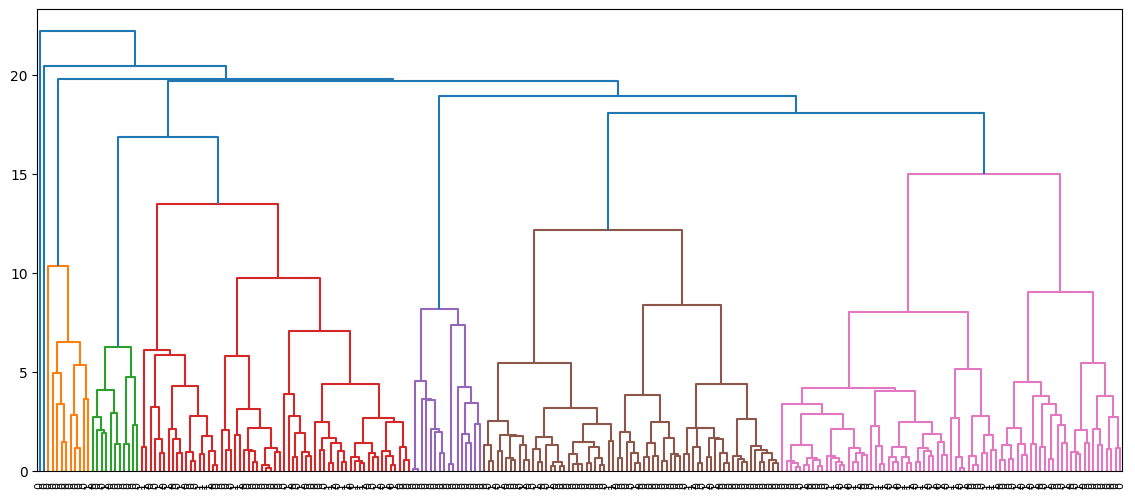

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Вычисляем матрицу расстояний
matr = linkage(X_Standard, method='ward', metric='euclidean')

plt.figure(figsize=(14, 6))
dendrogram(matr,labels=list(dataset.x11),leaf_rotation=90, leaf_font_size=8)

plt.show()

In [11]:
# Метим наблюдения номерами кластеров с учетом того, что кластеров будет 3
labels = fcluster(matr, 2, criterion='maxclust')

# и добавляем метки в датафрейм
dataset['labels_SciPy']=labels
dataset.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,labels_SciPy
0,170000,10200,0,0,2,0,0,1,35,9,0,1
1,657000,36135,0,0,1,0,1,1,33,10,0,1
2,463000,37641,0,0,4,0,0,0,37,17,0,1
3,3000000,136800,0,0,1,0,1,0,28,10,0,1
4,814500,49349,0,0,3,0,1,0,33,10,0,1


Посмотрим результаты классификации: построим таблицу сопряженности сортов и полученных кластеров

In [12]:
pd.crosstab(dataset['x11'], dataset['labels_SciPy'])

labels_SciPy,1,2
x11,,
0,178,1
1,65,0


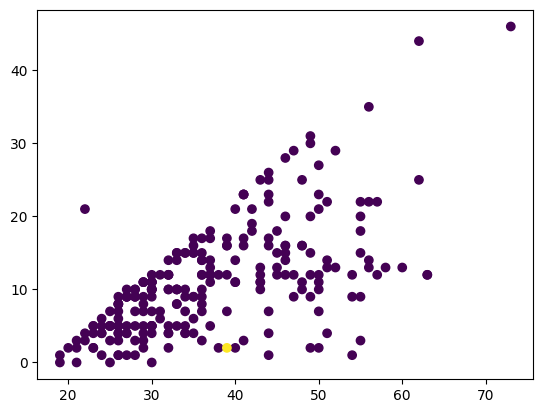

In [13]:
plt.scatter(dataset.x9, dataset.x10, c=labels)
plt.show()

### sklearn

Проведем иерархическую кластеризацию с использованием библиотеки AgglomerativeClustering

In [14]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
hierarchical_cluster.fit(X_Standard)

AgglomerativeClustering()

In [17]:
labels = hierarchical_cluster.labels_
dataset['labels_sklearn']=labels
dataset.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,labels_SciPy,labels_sklearn
0,170000,10200,0,0,2,0,0,1,35,9,0,1,0
1,657000,36135,0,0,1,0,1,1,33,10,0,1,0
2,463000,37641,0,0,4,0,0,0,37,17,0,1,0
3,3000000,136800,0,0,1,0,1,0,28,10,0,1,0
4,814500,49349,0,0,3,0,1,0,33,10,0,1,0


In [18]:
pd.crosstab(dataset['x11'], dataset['labels_sklearn'])

labels_sklearn,0,1
x11,,
0,178,1
1,65,0


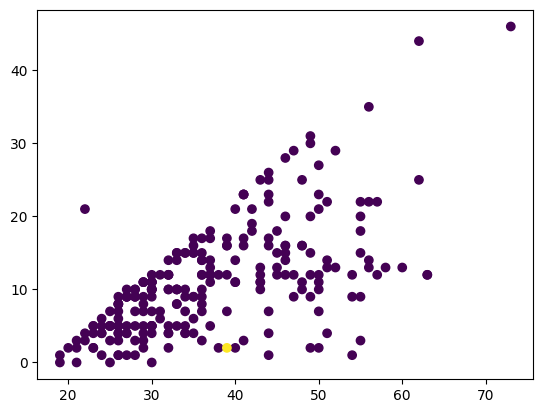

In [22]:
plt.scatter(dataset.x9, dataset.x10, c=labels)
plt.show()

## Метод k-средних

In [23]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(X_Standard)

KMeans(n_clusters=2)

In [24]:
labels = model.predict(X_Standard)
dataset['labels_k-средних']=labels
pd.crosstab(dataset['x11'], dataset['labels_k-средних'])

labels_k-средних,0,1
x11,,
0,58,121
1,28,37


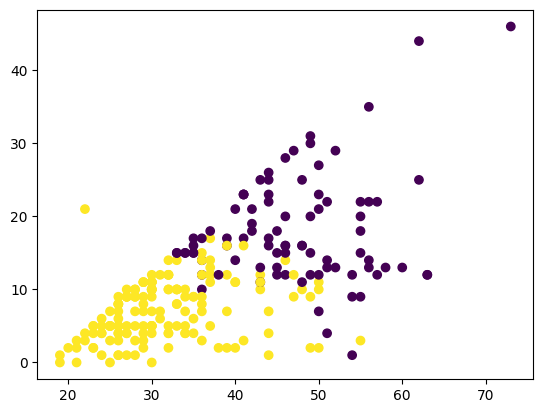

In [25]:
plt.scatter(dataset.x9, dataset.x10, c=labels)
plt.show()

Итог: все три рассмотренных метода не дает кластеризацию с достаточной степенью точности

Перейдем к главным компонентам, тем самым избавимся от коллинеарных признаков

In [26]:
from sklearn.decomposition import PCA, FactorAnalysis
pca = PCA(n_components=7)
pca.fit(X_Standard)
X_pca = pca.transform(X_Standard)

Теперь проведем кластеризацию по главным компонентам

In [27]:
model = KMeans(n_clusters=2)
model.fit(X_pca)

KMeans(n_clusters=2)

In [28]:
labels = model.predict(X_pca)
dataset['labels_k-средних_PSA']=labels
pd.crosstab(dataset['x11'], dataset['labels_k-средних_PSA'])

labels_k-средних_PSA,0,1
x11,,
0,16,163
1,0,65


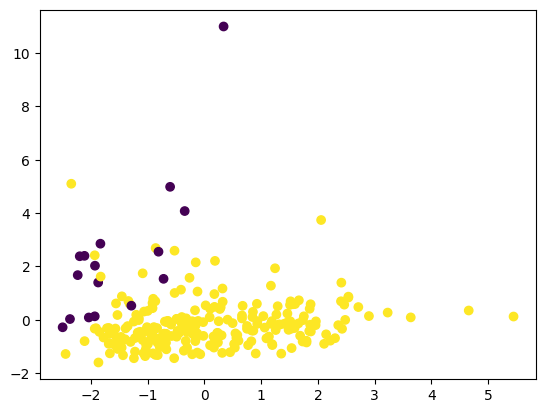

In [30]:
df=pd.DataFrame(X_pca)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=labels)
plt.show()

In [31]:
from statsmodels.multivariate.pca import PCA
pca_SM = PCA(X_Standard, ncomp=7, standardize=True)
X_pca =pca_SM.factors
model = KMeans(n_clusters=2)
model.fit(X_pca)
labels = model.predict(X_pca)
dataset['labels_k-средних_PSA']=labels
pd.crosstab(dataset['x11'], dataset['labels_k-средних_PSA'])

labels_k-средних_PSA,0,1
x11,,
0,10,169
1,1,64


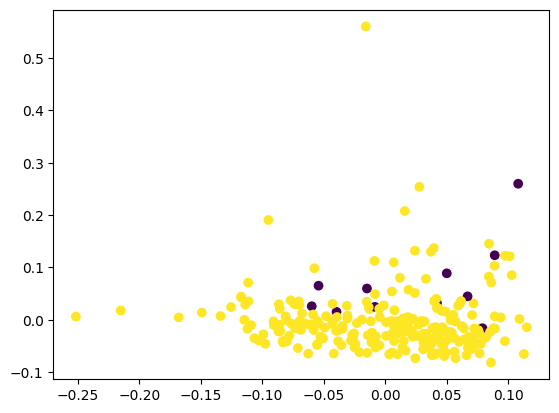

In [32]:
df=pd.DataFrame(X_pca)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=labels)
plt.show()